In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import re


In [8]:
df = pd.read_csv("./data/Wind-Solar Data 02-09 04-09 NL.csv")

In [9]:
df.head()

,Area,MTU,Solar - Actual Aggregated [MW] (D - 2),Solar - Actual Aggregated [MW] (D - 1),Solar - Actual Aggregated [MW] (D),Wind Offshore - Actual Aggregated [MW] (D - 2),Wind Offshore - Actual Aggregated [MW] (D - 1),Wind Offshore - Actual Aggregated [MW] (D),Wind Onshore - Actual Aggregated [MW] (D - 2),Wind Onshore - Actual Aggregated [MW] (D - 1),Wind Onshore - Actual Aggregated [MW] (D)
0,BZN|NL,02.09.2025 00:00 - 02.09.2025 00:15 (CET/CEST),0,0,0,2018,3695,4348,769,1411,1998
1,BZN|NL,02.09.2025 00:15 - 02.09.2025 00:30 (CET/CEST),0,0,0,1948,3743,4368,662,1397,1958
2,BZN|NL,02.09.2025 00:30 - 02.09.2025 00:45 (CET/CEST),0,0,0,2055,3862,4372,603,1395,1959
3,BZN|NL,02.09.2025 00:45 - 02.09.2025 01:00 (CET/CEST),0,0,0,2292,3837,4379,578,1404,1923
4,BZN|NL,02.09.2025 01:00 - 02.09.2025 01:15 (CET/CEST),0,0,0,2418,3725,4385,595,1409,1908


In [10]:
# The `MTU` column contains the time intervals as strings (e.g., `02.09.2025 00:00 - ...`).
# We extract the start time of the interval and convert it to a datetime object.

df["Timestamp"] = pd.to_datetime(
    df["MTU"].str.split(" - ").str[0], format="%d.%m.%Y %H:%M"
)

# Set this new 'Timestamp' column as the index of the DataFrame
df.set_index("Timestamp", inplace=True)

# Drop the original 'Area' and 'MTU' columns as they are no longer needed
df.drop(["Area", "MTU"], axis=1, inplace=True)

In [11]:
# Display the head of the transformed DataFrame
df.head()

,Solar - Actual Aggregated [MW] (D - 2),Solar - Actual Aggregated [MW] (D - 1),Solar - Actual Aggregated [MW] (D),Wind Offshore - Actual Aggregated [MW] (D - 2),Wind Offshore - Actual Aggregated [MW] (D - 1),Wind Offshore - Actual Aggregated [MW] (D),Wind Onshore - Actual Aggregated [MW] (D - 2),Wind Onshore - Actual Aggregated [MW] (D - 1),Wind Onshore - Actual Aggregated [MW] (D)
Timestamp,,,,,,,,,
2025-09-02 00:00:00,0,0,0,2018,3695,4348,769,1411,1998
2025-09-02 00:15:00,0,0,0,1948,3743,4368,662,1397,1958
2025-09-02 00:30:00,0,0,0,2055,3862,4372,603,1395,1959
2025-09-02 00:45:00,0,0,0,2292,3837,4379,578,1404,1923
2025-09-02 01:00:00,0,0,0,2418,3725,4385,595,1409,1908


In [12]:
# Step 3: Resample Data to Hourly Frequency
# With a proper datetime index, we can resample the data into 1-hour intervals ('H')
# and use .sum() to aggregate all the 15-minute readings within each hour.
df_hourly = df.resample("h").sum()

df_hourly.head()

,Solar - Actual Aggregated [MW] (D - 2),Solar - Actual Aggregated [MW] (D - 1),Solar - Actual Aggregated [MW] (D),Wind Offshore - Actual Aggregated [MW] (D - 2),Wind Offshore - Actual Aggregated [MW] (D - 1),Wind Offshore - Actual Aggregated [MW] (D),Wind Onshore - Actual Aggregated [MW] (D - 2),Wind Onshore - Actual Aggregated [MW] (D - 1),Wind Onshore - Actual Aggregated [MW] (D)
Timestamp,,,,,,,,,
2025-09-02 00:00:00,0,0,0,8313,15137,17467,2612,5607,7838
2025-09-02 01:00:00,0,0,0,9796,14944,17588,2602,5478,7464
2025-09-02 02:00:00,0,0,0,9518,16076,17448,2920,5601,7254
2025-09-02 03:00:00,0,0,0,8714,16988,17182,3306,5466,6552
2025-09-02 04:00:00,0,0,0,7184,17343,16687,3107,5817,6288


In [13]:
df_hourly_total_sum = df_hourly.sum()
df_hourly_total_sum

Solar - Actual Aggregated [MW] (D - 2)              8249
Solar - Actual Aggregated [MW] (D - 1)              5075
Solar - Actual Aggregated [MW] (D)                  7649
Wind Offshore - Actual Aggregated [MW] (D - 2)    225899
Wind Offshore - Actual Aggregated [MW] (D - 1)    379929
Wind Offshore - Actual Aggregated [MW] (D)        333025
Wind Onshore - Actual Aggregated [MW] (D - 2)      85330
Wind Onshore - Actual Aggregated [MW] (D - 1)     175317
Wind Onshore - Actual Aggregated [MW] (D)         129427
dtype: int64

In [8]:
# Divide each hourly value by the total sum of its respective column.
# This results in a *normalized hourly value* (a fraction of the total)
# where all values in each column sum up to 1.0.
df_normalized = df_hourly / df_hourly_total_sum
df_normalized.head()

,Solar - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW]
Timestamp,,,
2025-04-16 00:00:00,0.0,0.022365,0.035094
2025-04-16 01:00:00,0.0,0.041993,0.051276
2025-04-16 02:00:00,0.0,0.062275,0.080873
2025-04-16 03:00:00,0.0,0.066234,0.086543
2025-04-16 04:00:00,0.0,0.073009,0.091695


In [11]:
output_path = "./data/hourly_wind_solar_data_day_4.csv"
df_normalized.to_csv(output_path)

C:\Users\alexa\AppData\Local\Temp\ipykernel_30580\3008053938.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=10)


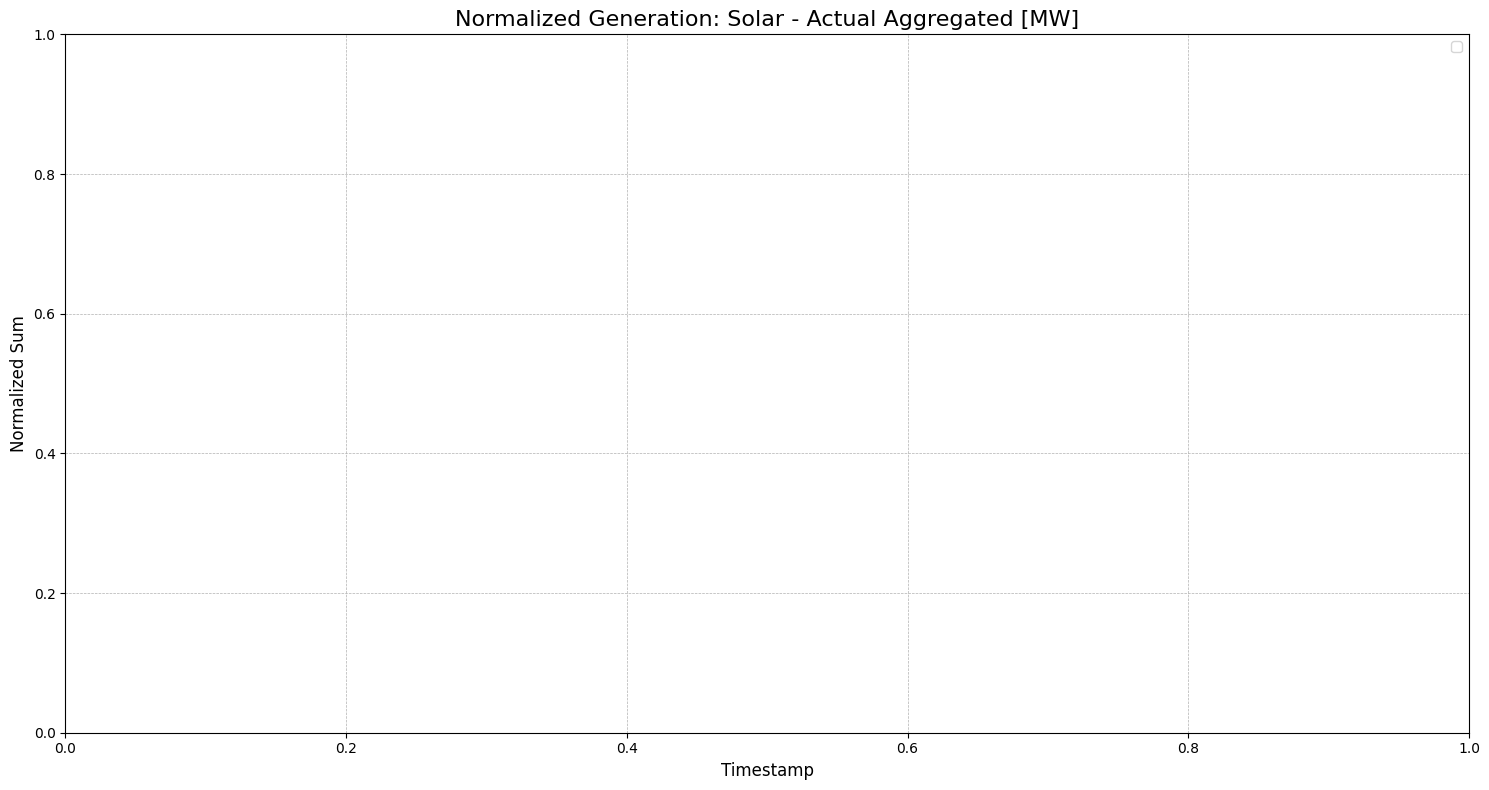

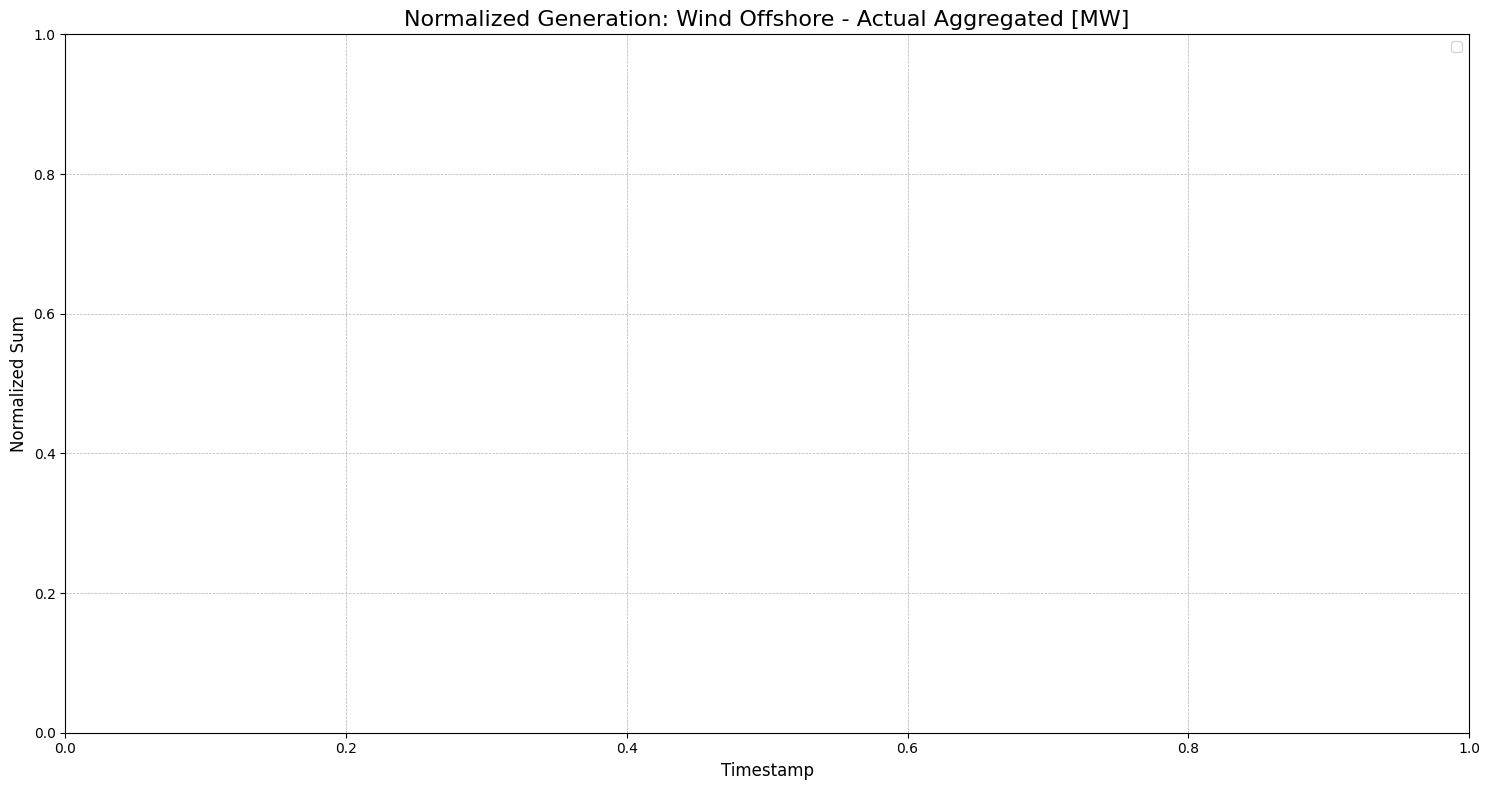

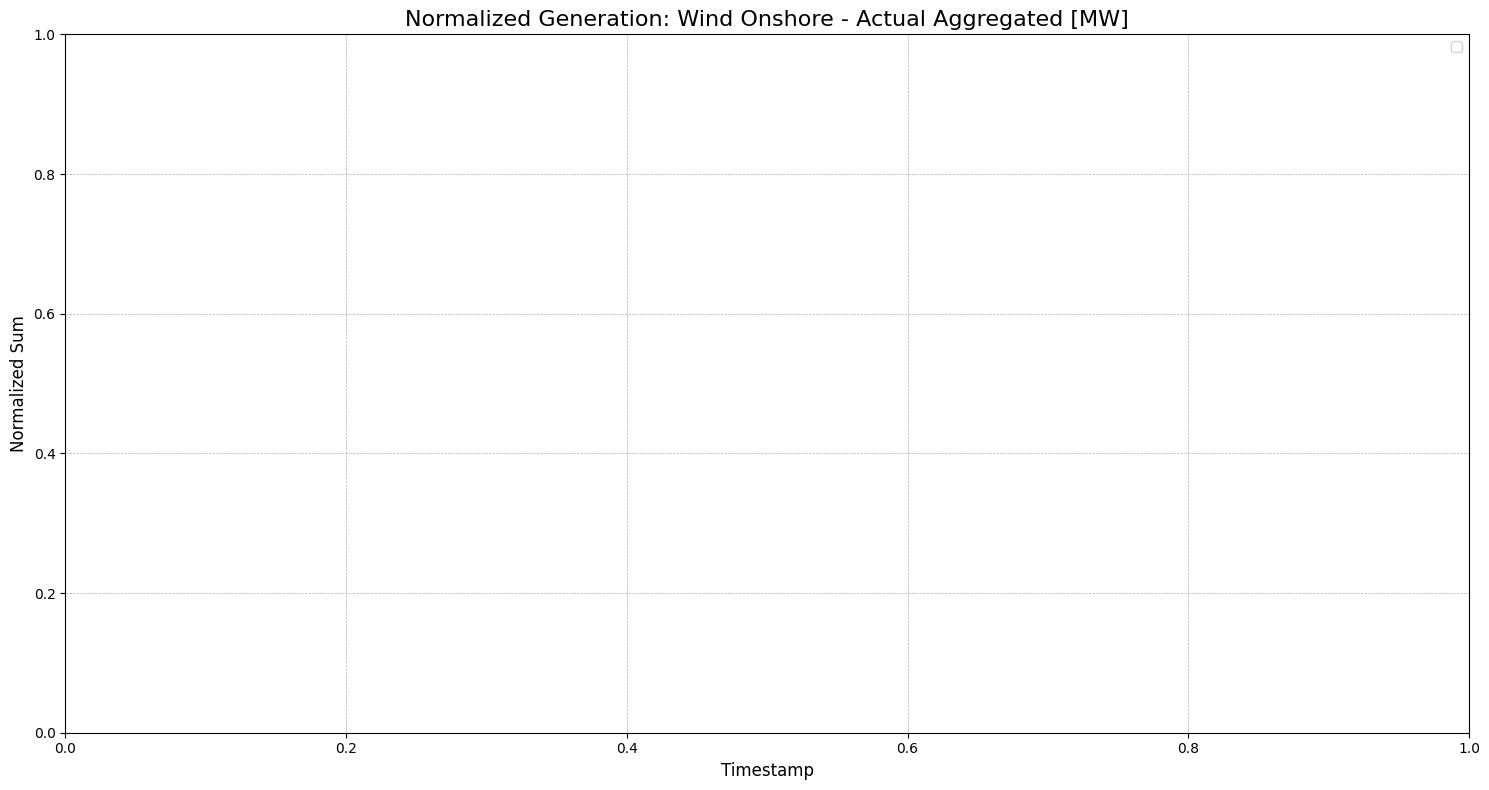

In [10]:
generation_types = set()
for col in df_normalized.columns:
    # Use regex to remove the (D...) part
    base_col = re.sub(r"\s*\([^)]*\)$", "", col)
    generation_types.add(base_col)

# Create a plot for each generation type
for gen_type in sorted(list(generation_types)):
    plt.figure(figsize=(15, 8))

    # Get the column names for D, D-1, and D-2
    col_d2 = f"{gen_type} (D - 2)"
    col_d1 = f"{gen_type} (D - 1)"
    col_d = f"{gen_type} (D)"

    # Check if columns exist before plotting
    if col_d2 in df_normalized.columns:
        plt.plot(
            df_normalized.index, df_normalized[col_d2], label="D - 2 (Two Days Prior)"
        )
    if col_d1 in df_normalized.columns:
        plt.plot(df_normalized.index, df_normalized[col_d1], label="D - 1 (Yesterday)")
    if col_d in df_normalized.columns:
        plt.plot(df_normalized.index, df_normalized[col_d], label="D (Current Day)")

    plt.title(f"Normalized Generation: {gen_type}", fontsize=16)
    plt.xlabel("Timestamp", fontsize=12)
    plt.ylabel("Normalized Sum", fontsize=12)
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend(fontsize=10)
    plt.tight_layout()

# Show all the generated plots